In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, QuantileTransformer, PowerTransformer, RobustScaler, MinMaxScaler
import math

In [2]:
def wrangle_grades():
    grades = pd.read_csv("student_grades.csv")
    grades.drop(columns='student_id', inplace=True)
    grades.replace(r'^\s*$', np.nan, regex=True, inplace=True)
    df = grades.dropna().astype('int')
    return df

In [3]:
def plot_grade_distributions(df):
    # histogram with subplots in matplot lib
    plt.figure(figsize=(16, 3))

    for i, col in enumerate(['exam1', 'exam2', 'exam3', 'final_grade']):  
        plot_number = i + 1 # i starts at 0, but plot nos should start at 1
        series = df[col]  
        plt.subplot(1,4, plot_number)
        plt.title(col)
        series.hist(bins=5, density=False, cumulative=False, log=False)
    
    # we don't want to plot the `student_id` column.
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df)
    plt.show()

In [4]:
def split_my_data(data):
    '''the function will take a dataframe and returns train and test dataframe split 
    where 80% is in train, and 20% in test. '''
    return train_test_split(data, train_size = .80, random_state = 123)

In [5]:
def standard_scaler(train, test):
    scaler = StandardScaler(copy=True, with_mean=True, with_std=True).fit(train) # fit the object
    train = pd.DataFrame(scaler.transform(train), columns=train.columns.values).set_index([train.index.values])
    test = pd.DataFrame(scaler.transform(test), columns=test.columns.values).set_index([test.index.values])
    return scaler, train, test

In [6]:
# If we wanted to return to original values:
def my_inv_transform(scaler, train, test):
    train = pd.DataFrame(scaler.inverse_transform(train), columns=train.columns.values).set_index([train.index.values])
    test = pd.DataFrame(scaler.inverse_transform(test), columns=test.columns.values).set_index([test.index.values])
    return scaler, train, test

In [7]:
def uniform_scaler(train, test):
    scaler = QuantileTransformer(n_quantiles=100, output_distribution='uniform', random_state=123, copy=True).fit(train)
    train = pd.DataFrame(scaler.transform(train), columns=train.columns.values).set_index([train.index.values])
    test = pd.DataFrame(scaler.transform(test), columns=test.columns.values).set_index([test.index.values])
    return scaler, train, test

In [12]:
def gaussian_scaler(train, test, method='yeo-johnson'):
    scaler = PowerTransformer(method, standardize=False, copy=True).fit(train)
    train = pd.DataFrame(scaler.transform(train), columns=train.columns.values).set_index([train.index.values])
    test = pd.DataFrame(scaler.transform(test), columns=test.columns.values).set_index([test.index.values])
    return scaler, train, test

In [14]:
def my_minmax_scaler(train, test, minmax_range=(0,1)):
    scaler = MinMaxScaler(copy=True, feature_range=minmax_range).fit(train)
    train = pd.DataFrame(scaler.transform(train), columns=train.columns.values).set_index([train.index.values])
    test = pd.DataFrame(scaler.transform(test), columns=test.columns.values).set_index([test.index.values])
    return scaler, train, test

In [17]:
def iqr_robust_scaler(train, test):
    scaler = RobustScaler(quantile_range=(25.0,75.0), copy=True, with_centering=True, with_scaling=True).fit(train)
    train = pd.DataFrame(scaler.transform(train), columns=train.columns.values).set_index([train.index.values])
    test = pd.DataFrame(scaler.transform(test), columns=test.columns.values).set_index([test.index.values])
    return scaler, train, test

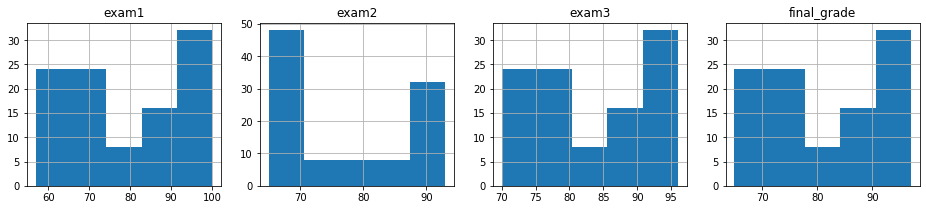

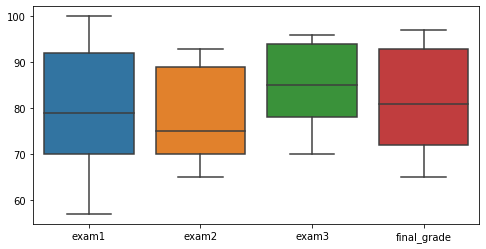

train shape: (83, 4)
test shape: (21, 4)
Mean:
[79.12048193 77.80722892 84.69879518 82.25301205]
Standard Deviation:
[14.137361924255325, 10.341701558074101, 8.625731943461883, 10.868151075276584]


In [8]:
if __name__ == '__main__':
    df = wrangle_grades()
    plot_grade_distributions(df)
    train, test = split_my_data(data=df)
    print('train shape:', train.shape)
    print('test shape:', test.shape)
    scaler, train_scaled, test_scaled = standard_scaler(train, test)
    print("Mean:") 
    print(scaler.mean_)
    print("Standard Deviation:")
    print([math.sqrt(i) for i in scaler.var_])

In [9]:
# train.head()

,exam1,exam2,exam3,final_grade
50,57,65,75,65
29,83,80,86,85
54,85,83,87,87
19,92,89,94,93
59,73,70,75,76


In [10]:
# scaler, train, test = my_inv_transform(scaler, train_scaled, test_scaled)
# train.head()

,exam1,exam2,exam3,final_grade
50,57.0,65.0,75.0,65.0
29,83.0,80.0,86.0,85.0
54,85.0,83.0,87.0,87.0
19,92.0,89.0,94.0,93.0
59,73.0,70.0,75.0,76.0


In [11]:
# scaler, train_scaled, test_scaled = uniform_scaler(train, test)

# train_scaled.head()

,exam1,exam2,exam3,final_grade
50,0.000000,0.000000,0.128049,0.000000
29,0.560976,0.560976,0.560976,0.560976
54,0.634146,0.634146,0.634146,0.634146
19,0.713415,0.713415,0.713415,0.713415
59,0.402439,0.323171,0.128049,0.323171


In [13]:
# scaler, train_scaled, test_scaled = gaussian_scaler(train, test, method='yeo-johnson')

# train_scaled.head()

,exam1,exam2,exam3,final_grade
50,59.551809,1.966271,15.324354,41.133319
29,87.144136,1.999806,16.530168,51.903988
54,89.272127,2.005464,16.635884,52.959935
19,96.725441,2.015962,17.359585,56.107557
59,76.515142,1.978563,15.324354,47.107256


In [15]:
# scaler, train_scaled, test_scaled = my_minmax_scaler(train, test)

# train_scaled.head()

,exam1,exam2,exam3,final_grade
50,0.000000,0.000000,0.192308,0.00000
29,0.604651,0.535714,0.615385,0.62500
54,0.651163,0.642857,0.653846,0.68750
19,0.813953,0.857143,0.923077,0.87500
59,0.372093,0.178571,0.192308,0.34375


In [18]:
# scaler, train_scaled, test_scaled = iqr_robust_scaler(train, test)

# train_scaled.head()

,exam1,exam2,exam3,final_grade
50,-1.000000,-0.526316,-0.6250,-0.761905
29,0.181818,0.263158,0.0625,0.190476
54,0.272727,0.421053,0.1250,0.285714
19,0.590909,0.736842,0.5625,0.571429
59,-0.272727,-0.263158,-0.6250,-0.238095
